In [234]:
# Basic
import numpy as np
import pandas as pd

# Load market data
import gsampler as gs

# Visualization
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [235]:
def get_dataframe(symbol, colo, date):
    '''
    Obtaining a dataframe directly from gsampler:
    The dataframe contains:
        ask_book_price, ask_book_size from level 1 to level 4
        bid_book_price, bid_book_size from level 1 to level 4
    '''
    dates = [date]
    features = []
    for i in range(3):
        features.append(gs.FeatureAskPrice(symbol = symbol, level = i))
        features.append(gs.FeatureAskQty(symbol = symbol, level = i))
    for i in range(3):
        features.append(gs.FeatureBidPrice(symbol = symbol, level = i))
        features.append(gs.FeatureBidQty(symbol = symbol, level = i))
    features.append(gs.FeatureTickerIdCast())
    sampler = gs.SamplerRunner(features = features, dates = dates, colo = colo, cb_version = 'v2')
    sampler.run()
    df = sampler.load_data_df()
    df = df.between_time(start_time='09:02:00', end_time='15:33:00')
    df = df.fillna(0.)
    df.columns = ['ask_prc_0', 'ask_size_0', 
                  'ask_prc_1', 'ask_size_1', 
                  'ask_prc_2', 'ask_size_2', 
                  'bid_prc_0', 'bid_size_0', 
                  'bid_prc_1', 'bid_size_1', 
                  'bid_prc_2', 'bid_size_2',
                  'a', 'b', 'time']
    df.drop('a', axis=1, inplace=True)
    df.drop('b', axis=1, inplace=True) 
    return df

DEBUG(PY: /ginkgo/Json.py:128:save) Writing file: /cache/zebo/5c29e730c5e64d1dd837906db638c2c301c7e97c/f8a925cd79afd73b0ae0448e76b452c4e947f226.json
DEBUG(PY: /ginkgo/Json.py:128:save) Writing file: /cache/zebo/5c29e730c5e64d1dd837906db638c2c301c7e97c/f8a925cd79afd73b0ae0448e76b452c4e947f226.json
*** All 1 day(s) have been sampled, clear_cache to resample OR add more days  
reading date=20171129 started


,ask_prc_0,ask_size_0,ask_prc_1,ask_size_1,ask_prc_2,ask_size_2,bid_prc_0,bid_size_0,bid_prc_1,bid_size_1,bid_prc_2,bid_size_2,time
time,,,,,,,,,,,,,
2017-11-29 09:02:00.016377,1084.2,30.0,1084.3,275.0,1084.4,99.0,1084.1,90.0,1084.0,82.0,1083.9,160.0,3.252002e+10
2017-11-29 09:02:00.018001,1084.2,30.0,1084.3,275.0,1084.4,99.0,1084.1,95.0,1084.0,82.0,1083.9,160.0,3.252002e+10


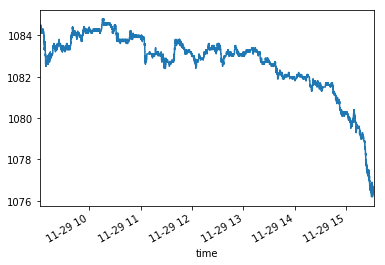

In [236]:
df = get_dataframe('KRW_G0.KRX', 'KRX', '20171129')
display(df[:2])
df.ask_prc_0.plot()

##### Get the max, min prices

In [237]:
ap_df =  df[['ask_prc_0', 'ask_prc_1', 'ask_prc_2']]
print "MAX_ASK_LEVEL_PRICE: ", ap_df.as_matrix().max()
print "MIN_ASK_LEVEL_PRICE: ", ap_df.as_matrix().min()

MAX_ASK_LEVEL_PRICE:  1085.0
MIN_ASK_LEVEL_PRICE:  1076.2


In [238]:
bp_df =  df[['bid_prc_0', 'bid_prc_1', 'bid_prc_2']]
print "MAX_BID_LEVEL_PRICE: ", bp_df.as_matrix().max()
print "MIN_BID_LEVEL_PRICE: ", bp_df.as_matrix().min()

MAX_BID_LEVEL_PRICE:  1084.7
MIN_BID_LEVEL_PRICE:  1075.9


##### Set base price and convert prices into levels

In [239]:
BASE_PRICE = 1070.0
DELTA = 0.001
TICK_SIZE = 0.1
for i in range(3):
    df["ask_prc_{0}".format(str(i))] = ((df["ask_prc_{0}".format(str(i))].as_matrix() + 
                                        DELTA - BASE_PRICE)/TICK_SIZE).astype(np.int32)
    df["bid_prc_{0}".format(str(i))] = ((df["bid_prc_{0}".format(str(i))].as_matrix() + 
                                        DELTA - BASE_PRICE)/TICK_SIZE).astype(np.int32)
display(df[:3])

,ask_prc_0,ask_size_0,ask_prc_1,ask_size_1,ask_prc_2,ask_size_2,bid_prc_0,bid_size_0,bid_prc_1,bid_size_1,bid_prc_2,bid_size_2,time
time,,,,,,,,,,,,,
2017-11-29 09:02:00.016377,142,30.0,143,275.0,144,99.0,141,90.0,140,82.0,139,160.0,3.252002e+10
2017-11-29 09:02:00.018001,142,30.0,143,275.0,144,99.0,141,95.0,140,82.0,139,160.0,3.252002e+10
2017-11-29 09:02:00.018627,142,30.0,143,275.0,144,99.0,141,95.0,140,87.0,139,160.0,3.252002e+10


##### Convert volumes in to integers

In [240]:
for i in range(3):
    df["ask_size_{0}".format(str(i))] = df["ask_size_{0}".format(str(i))].as_matrix().astype(np.int32)
    df["bid_size_{0}".format(str(i))] = df["bid_size_{0}".format(str(i))].as_matrix().astype(np.int32)
display(df[:3])

,ask_prc_0,ask_size_0,ask_prc_1,ask_size_1,ask_prc_2,ask_size_2,bid_prc_0,bid_size_0,bid_prc_1,bid_size_1,bid_prc_2,bid_size_2,time
time,,,,,,,,,,,,,
2017-11-29 09:02:00.016377,142,30,143,275,144,99,141,90,140,82,139,160,3.252002e+10
2017-11-29 09:02:00.018001,142,30,143,275,144,99,141,95,140,82,139,160,3.252002e+10
2017-11-29 09:02:00.018627,142,30,143,275,144,99,141,95,140,87,139,160,3.252002e+10


##### Parse them into intervals

In [241]:
def getIntervalBookInfo(df, date, start_time, end_time, time_interval='500000U'):
    common_tseries = pd.DataFrame(pd.date_range("{0} {1}".format(date, start_time), 
                                                "{0} {1}".format(date, end_time), freq = time_interval))
    common_tseries = common_tseries.set_index(common_tseries.columns.values[0])
    common_index = common_tseries.index
    
    df = df.groupby(df.index).first()                                   # Remove duplicate indices
    
    uidx = df.index.union(common_index)                                 # We need first reindex the data on a union of indices
    df = df.reindex(uidx)
    df = df.ffill()                                       # Using forward fill to fill in the missing data
    df = df.reindex(common_index)                                       # using ghe common timestamps as index
    return df
df_interval = getIntervalBookInfo(df, "2017-11-30", "09:02", "15:33")
df_interval = pd.DataFrame(df_interval, dtype=np.int32)
display(df_interval[:3])
print df_interval.shape

,ask_prc_0,ask_size_0,ask_prc_1,ask_size_1,ask_prc_2,ask_size_2,bid_prc_0,bid_size_0,bid_prc_1,bid_size_1,bid_prc_2,bid_size_2,time
0,,,,,,,,,,,,,
2017-11-30 09:02:00.000,66,67,67,264,68,214,65,87,64,162,63,234,-2147483648
2017-11-30 09:02:00.500,66,67,67,264,68,214,65,87,64,162,63,234,-2147483648
2017-11-30 09:02:01.000,66,67,67,264,68,214,65,87,64,162,63,234,-2147483648


(46921, 13)


##### CREAT FEATURES AND TARGETS

In [242]:
LOOK_BACK = 60
HORIZON = 1
def get_windows(x):
    return [np.array(x[i: i+LOOK_BACK]) for i in range(len(x) - LOOK_BACK - HORIZON - 10)]
def get_target(y):
    return [y[i + LOOK_BACK + HORIZON - 1] - y[i + LOOK_BACK - 1] for i in range(len(y) - LOOK_BACK - HORIZON - 10)]
def get_train_data(df):
    data = {
        'ask_price': get_windows(df.ask_prc_0.values),
        'ask_size': get_windows(df.ask_size_0.values),
        'bid_price': get_windows(df.bid_prc_0.values),
        'bid_size': get_windows(df.bid_size_0.values),
        'target': get_target(df.ask_prc_0.values)
    }
    return pd.DataFrame(data)
raw_df = get_train_data(df)
display(raw_df[:3])
print np.array(raw_df.ask_price.tolist()).shape

,ask_price,ask_size,bid_price,bid_size,target
0,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[90, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...",0
1,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 15, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...",0
2,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 35, 15, 15, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...",0


(181340, 60)


In [243]:
## For embedding dimension
MAX_PRICE = df.ask_prc_0.max() + 5
MAX_SIZE = np.max([df.ask_size_0.max(), df.bid_size_0.max()]) + 5
print MAX_PRICE, MAX_SIZE

153 826


In [244]:
# Using sklearn and keras
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import LearningRateScheduler
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.preprocessing.sequence import pad_sequences

In [245]:
raw_df.target = raw_df.target - raw_df.target.min()
n_cls = raw_df.target.max() + 1
print n_cls
print raw_df.target.values
max(raw_df.target.values)

5
[2 2 2 ..., 2 2 2]


4

In [246]:
## Deal with class weights
# Function to compute class weights
def comp_cls_wts(y, pwr = 0.5):
    '''
    Used to compute class weights
    '''
    dic = {}
    for x in set(y):
        dic[x] = len(y)**pwr/list(y).count(x)**pwr
    return dic
cls_wts = comp_cls_wts(raw_df.target.tolist())
print cls_wts
y = np_utils.to_categorical(raw_df.target.values, num_classes=n_cls)
raw_df.target = list(y)
display(raw_df[:3])

{0: 425.8403456695948, 1: 9.255212117841745, 2: 1.0116713636169228, 3: 9.425953724991103, 4: 425.8403456695948}


,ask_price,ask_size,bid_price,bid_size,target
0,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[90, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...","[0.0, 0.0, 1.0, 0.0, 0.0]"
1,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 15, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...","[0.0, 0.0, 1.0, 0.0, 0.0]"
2,"[142, 142, 142, 142, 142, 142, 142, 142, 142, ...","[30, 30, 30, 30, 30, 30, 30, 30, 35, 15, 15, 1...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9...","[0.0, 0.0, 1.0, 0.0, 0.0]"


In [247]:
train, valid = train_test_split(raw_df, random_state=123, train_size=0.7)
print train.shape, valid.shape
print raw_df.target.as_matrix()[0]

(126937, 5) (54403, 5)
[ 0.  0.  1.  0.  0.]


In [248]:
## Input layers
ap = Input(shape=[LOOK_BACK], name="ask_price")
az = Input(shape=[LOOK_BACK], name="ask_size")
bp = Input(shape=[LOOK_BACK], name="bid_price")
bz = Input(shape=[LOOK_BACK], name="bid_size")

In [249]:
## Embedding layers
emb_ap = Embedding(MAX_PRICE, 64)(ap)
emb_az = Embedding(MAX_PRICE, 64)(az)
emb_bp = Embedding(MAX_PRICE, 64)(bp)
emb_bz = Embedding(MAX_PRICE, 64)(bz)

In [250]:
rnn_ap = GRU(16) (emb_ap)
rnn_az = GRU(16) (emb_ap)
rnn_bp = GRU(16) (emb_bp)
rnn_bz = GRU(16) (emb_bz)

In [251]:
prc_layer = concatenate([
    rnn_ap,
    rnn_bp
])
prc_layer = Dropout(0.5) (Dense(32) (prc_layer))

size_layer = concatenate([
    rnn_az,
    rnn_bz
])
size_layer = Dropout(0.5) (Dense(32) (size_layer))

In [252]:
main_layer = concatenate([
    prc_layer,
    size_layer
])
main_layer = Dropout(0.5) (Dense(32) (main_layer))

#output
output = Dense(n_cls, activation="softmax") (main_layer)

In [253]:
model = Model([ap, az, bp, bz], output)
optimizer = SGD()
metrics = ['accuracy']
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = metrics)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
ask_price (InputLayer)           (None, 60)            0                                            
____________________________________________________________________________________________________
bid_price (InputLayer)           (None, 60)            0                                            
____________________________________________________________________________________________________
bid_size (InputLayer)            (None, 60)            0                                            
____________________________________________________________________________________________________
embedding_25 (Embedding)         (None, 60, 64)        9792                                         
___________________________________________________________________________________________

In [257]:
#FITTING THE MODEL
BATCH_SIZE  =  256
epochs = 8
tr = {
    'ask_price': np.array(train.ask_price.tolist()),
    'ask_size': np.array(train.ask_size.tolist()),
    'bid_price': np.array(train.bid_price.tolist()),
    'bid_size': np.array(train.bid_size.tolist())
}
vd = {
    'ask_price': np.array(valid.ask_price.tolist()),
    'ask_size': np.array(valid.ask_size.tolist()),
    'bid_price': np.array(valid.bid_price.tolist()),
    'bid_size': np.array(valid.bid_size.tolist())
}
tt = np.array(train.target.tolist())
vt = np.array(valid.target.tolist())
model.fit(tr, tt, epochs=epochs, 
          batch_size=BATCH_SIZE, validation_data=(vd, vt), verbose=1)

Train on 126937 samples, validate on 54403 samples
Epoch 1/8
126937/126937 [==============================] - 399s - loss: 0.2460 - acc: 0.9731 - val_loss: 0.1416 - val_acc: 0.9769
Epoch 2/8
126937/126937 [==============================] - 296s - loss: 0.1640 - acc: 0.9771 - val_loss: 0.1360 - val_acc: 0.9769
Epoch 3/8
126937/126937 [==============================] - 259s - loss: 0.1579 - acc: 0.9771 - val_loss: 0.1333 - val_acc: 0.9769
Epoch 4/8
126937/126937 [==============================] - 286s - loss: 0.1530 - acc: 0.9771 - val_loss: 0.1317 - val_acc: 0.9769
Epoch 5/8
126937/126937 [==============================] - 341s - loss: 0.1501 - acc: 0.9771 - val_loss: 0.1311 - val_acc: 0.9769
Epoch 6/8
126937/126937 [==============================] - 247s - loss: 0.1472 - acc: 0.9771 - val_loss: 0.1303 - val_acc: 0.9769
Epoch 7/8
126937/126937 [==============================] - 283s - loss: 0.1452 - acc: 0.9771 - val_loss: 0.1297 - val_acc: 0.9769
Epoch 8/8
126937/126937 [==============